In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.style.use("~/.dracula.mplstyle")
import seaborn as sns

#### Loading Data

In [2]:
xlsx = pd.ExcelFile("multi_asset_etf_data.xlsx")
print(xlsx.sheet_names)
ex = xlsx.parse(xlsx.sheet_names[2])
ex.set_index("Date", inplace=True)
ex.head()

['descriptions', 'total returns', 'excess returns']


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295597,0.229649,0.022329,0.098792,-0.018505
2009-05-31,0.054144,0.163135,0.159872,0.132390,0.029027,-0.020301,0.023200,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014648,0.032918,-0.006171,-0.025463,0.044849,-0.004036,-0.001254,0.001382
2009-07-31,0.031311,0.018595,0.110173,0.100442,0.069217,0.008345,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017405,0.007198,0.131503,0.032977,-0.004587,0.036505,0.007978


In [3]:
xlsx.parse(xlsx.sheet_names[0])

,Unnamed: 0,ETF Description
0,SPY,Domestic Equity SPDR S&P500
1,EFA,Foreign Equity iShares EAFE
2,EEM,iShares Emerging Markets
3,PSP,Private Equity Invesco Global Private Equity
4,QAI,Absolute Return IQ Multi-Strat
5,HYG,High Yield iShares High Yield Corporate Bond
6,DBC,Invesco DB Commodity Index Tracking Fund
7,IYR,Real Estate iShares US Real Estate
8,IEF,Domestic Bonds iShares 7-10 Year Treasury
9,BWX,Foreign Bonds SPDR Bloomberg Barclay Internati...


# Summary Statistics
(a) Calculate and display the mean and volatility of each asset's excess return (Recall we use volatility to refer to standard deviation.)

(b) Which assets have the best and worst Sharpe ratios?

In [4]:
ex_des = ex.describe()
print("Monthly Statistics:")
ex_des

Monthly Statistics:


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.001735,0.000838,0.007759,0.008270,0.006766,0.002785,0.013693,0.014187,0.002316,0.013742,0.003104
std,0.021450,0.051190,0.056635,0.046569,0.024823,0.016424,0.051986,0.061607,0.013799,0.040174,0.013034
min,-0.068410,-0.177562,-0.179083,-0.145227,-0.104441,-0.043973,-0.200485,-0.278880,-0.060508,-0.129032,-0.041842
25%,-0.011570,-0.030398,-0.029046,-0.021504,-0.004739,-0.006556,-0.011933,-0.016986,-0.005045,-0.003919,-0.004917
50%,0.003018,-0.000473,0.003909,0.009207,0.005246,0.000700,0.010836,0.016745,0.002396,0.017545,0.003282
75%,0.014511,0.037292,0.038664,0.034870,0.016718,0.011433,0.040476,0.045995,0.009403,0.036453,0.010239
max,0.061232,0.163135,0.162804,0.142902,0.137906,0.046105,0.295597,0.229649,0.033957,0.126767,0.039559


In [5]:
def portstats(v, nper=1):
    try:
        c = v.columns
    except AttributeError:
        c = ["Portfolio"]
    vd = v.describe().T
    mu = vd["mean"] * nper
    sig = vd["std"] * np.sqrt(nper)
    vshaped = pd.DataFrame([mu, sig, mu / sig],
                           index=["mean", "std", "sharpe"], columns=c)
    return vshaped

print("Annual Statistics:")
stats = portstats(ex, 12)
stats

Annual Statistics:


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
mean,0.020819,0.010053,0.093103,0.099239,0.081193,0.033424,0.164311,0.170243,0.027795,0.164907,0.037242
std,0.074304,0.177327,0.196190,0.161319,0.085989,0.056895,0.180085,0.213412,0.047800,0.139166,0.045151
sharpe,0.280189,0.056689,0.474556,0.615174,0.944231,0.587473,0.912408,0.797721,0.581490,1.184963,0.824835


In [6]:
best = stats.T["sharpe"].idxmax()
worst = stats.T["sharpe"].idxmin()

print(f"The asset with the BEST Sharpe Ratio is {best}.")
print(f"The asset with the WORST Sharpe Ratio is {worst}")

The asset with the BEST Sharpe Ratio is SPY.
The asset with the WORST Sharpe Ratio is DBC


# Descriptive Analysis

(a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

In [7]:
c = ex.corr()
c

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.437619,0.608377,0.552190,0.479980,0.235399,0.397112,0.456009,0.605444,0.373806,0.526797
DBC,0.437619,1.000000,0.619991,0.634630,0.530205,-0.379698,0.321818,0.575219,0.617904,0.574377,0.137627
EEM,0.608377,0.619991,1.000000,0.854021,0.748341,-0.311420,0.614140,0.804353,0.805874,0.757758,0.221171
EFA,0.552190,0.634630,0.854021,1.000000,0.750992,-0.378969,0.666056,0.908241,0.830229,0.873131,0.138746
HYG,0.479980,0.530205,0.748341,0.750992,1.000000,-0.237206,0.757550,0.820091,0.745370,0.746024,0.208048
IEF,0.235399,-0.379698,-0.311420,-0.378969,-0.237206,1.000000,-0.079125,-0.404348,-0.161356,-0.419998,0.649038
IYR,0.397112,0.321818,0.614140,0.666056,0.757550,-0.079125,1.000000,0.734348,0.601285,0.716066,0.283457
PSP,0.456009,0.575219,0.804353,0.908241,0.820091,-0.404348,0.734348,1.000000,0.810628,0.894176,0.135455
QAI,0.605444,0.617904,0.805874,0.830229,0.745370,-0.161356,0.601285,0.810628,1.000000,0.820112,0.337546
SPY,0.373806,0.574377,0.757758,0.873131,0.746024,-0.419998,0.716066,0.894176,0.820112,1.000000,0.103265


<AxesSubplot:>

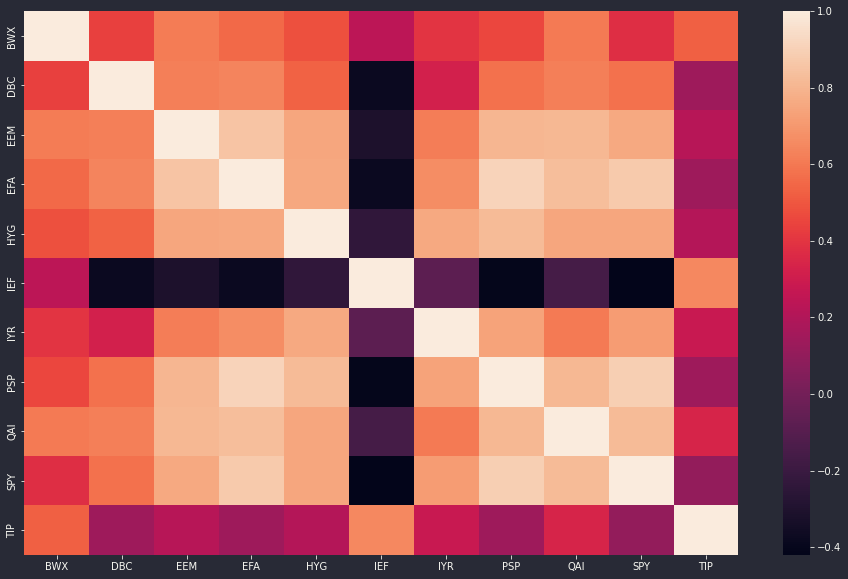

In [8]:
sns.heatmap(c)

In [9]:
cu = c.unstack().sort_values(ascending=False)
cu = cu[c.shape[0]:]

print(f"The pair with the HIGHEST correlation is {cu.idxmax()} at {cu.max()}")
print(f"The pair with the LOWEST  correlation is {cu.idxmin()} at {cu.min()}")

The pair with the HIGHEST correlation is ('EFA', 'PSP') at 0.9082411900568548
The pair with the LOWEST  correlation is ('IEF', 'SPY') at -0.4199984313967293


(b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

(c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

In [10]:
xlsx.parse(xlsx.sheet_names[0])

,Unnamed: 0,ETF Description
0,SPY,Domestic Equity SPDR S&P500
1,EFA,Foreign Equity iShares EAFE
2,EEM,iShares Emerging Markets
3,PSP,Private Equity Invesco Global Private Equity
4,QAI,Absolute Return IQ Multi-Strat
5,HYG,High Yield iShares High Yield Corporate Bond
6,DBC,Invesco DB Commodity Index Tracking Fund
7,IYR,Real Estate iShares US Real Estate
8,IEF,Domestic Bonds iShares 7-10 Year Treasury
9,BWX,Foreign Bonds SPDR Bloomberg Barclay Internati...


# The MV frontier

(a) Compute and display the weights of the tangency portfolios: $\omega^{tan}$.

$$
\omega^{tan} = \biggl( \frac{1}{\mathbb{1}^T \Sigma^{-1} \tilde{\mu}} \biggr) \Sigma^{-1} \tilde{\mu} \\
$$

In [11]:
def mvtan(cov, mu):
    wt = np.linalg.inv(cov.values) @ mu
    return pd.Series(wt / sum(wt), index=cov.index)

cov = ex.cov()
wt = mvtan(cov, stats.T["mean"])
wt

BWX   -0.259236
DBC   -0.049786
EEM    0.068120
EFA   -0.157671
HYG    0.775635
IEF    1.734962
IYR   -0.366667
PSP   -0.000685
QAI   -2.477194
SPY    1.540749
TIP    0.191773
dtype: float64

(b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to $\omega^{tan}$.

In [12]:
vtan = ex @ wt
vtan_stats = portstats(vtan, 12)

vtan_stats
# month_to_year(vtan_stats)

,Portfolio
mean,0.237767
std,0.104802
sharpe,2.268728


# The allocation.

(a) Compute and display the weights of MV portfolios with target returns of $\tilde{\mu}^p$ = .01

$$\begin{aligned}
w^* &= \tilde{\delta} w^t \\
w^t &= \underbrace{\biggl( \frac{1}{\mathbb{1}^T \Sigma^{-1} \tilde{\mu}} \biggr)}_{\text{scalar}} \Sigma^{-1} \tilde{\mu} \\
\tilde{\delta} &= \underbrace{\biggl( \frac{\mathbb{1}^T \Sigma^{-1} \tilde{\mu}}{\tilde{\mu}^T \Sigma^{-1} \tilde{\mu}} \biggr)}_{\text{scalar}} \underbrace{\tilde{\mu}^p}_{\text{scalar}} \\
w^* &= \tilde{\mu}^p \biggl( \frac{1}{\mathbb{1}^T \Sigma^{-1} \tilde{\mu}} \biggr) \biggl( \frac{\mathbb{1}^T \Sigma^{-1} \tilde{\mu}}{\tilde{\mu}^T \Sigma^{-1} \tilde{\mu}} \biggr) \Sigma^{-1} \tilde{\mu} \\
w^* &= \tilde{\mu}^p \biggl( \frac{1}{\tilde{\mu}^T \Sigma^{-1} \tilde{\mu}} \biggr) \Sigma^{-1} \tilde{\mu} \\
\end{aligned}$$

In [13]:
def mvport(cov, mu, target):
    covinv = np.linalg.inv(cov)
#     wmv = target / (mu.T.dot(covinv).dot(mu)) * covinv.dot(mu)
    wmv = target / (mu.T @ covinv @ mu) * covinv @ mu
    return pd.Series(wmv, index=cov.index)

target = .01
wmv = mvport(cov, stats.T["mean"], target)
print(wmv)
print(f"Therefore, the allocation to Treasuries is {1-sum(wmv)}")

BWX   -0.010903
DBC   -0.002094
EEM    0.002865
EFA   -0.006631
HYG    0.032622
IEF    0.072969
IYR   -0.015421
PSP   -0.000029
QAI   -0.104186
SPY    0.064801
TIP    0.008066
dtype: float64
Therefore, the allocation to Treasuries is 0.9579420477697917


(b) What is the mean, volatility, and Sharpe ratio for wp?

In [14]:
vmv = ex @ wmv
vmv_stats = portstats(vmv, 12)
vmv_stats

,Portfolio
mean,0.010000
std,0.004408
sharpe,2.268728


(c) Discuss the allocation. In which assets is the portfolio most long? And short?

(d) Does this line up with which assets have the strongest Sharpe ratios?

# Simple Portfolios

(a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean $\tilde{w}$ = .01. Report its mean, volatility, and Sharpe ratio.

In [15]:
n = ex.shape[1]
we = np.ones(n) * 1/n

ve = ex @ we
ve_stats = portstats(ve, 12)
ve_stats

,Portfolio
mean,0.082030
std,0.098133
sharpe,0.835910


In [16]:
scale = target / (stats.T["mean"] @ we)
wes = we * scale
ves = ex @ wes
ves_stats = portstats(ves, 12)
ves_stats

,Portfolio
mean,0.010000
std,0.011963
sharpe,0.835910


(b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample volatility estimate.
$$w^i = \frac{1}{\sigma_i}$$
This will give the weight vector, w, but you will need to rescale it to have a target mean of $\tilde{\mu}$ = .01.

In [17]:
wi = 1 / stats.T["std"]
scale = target / (stats.T["mean"] @ wi)
wis = wi * scale
vis = ex @ wis
vis_stats = portstats(vis, 12)
vis_stats

,Portfolio
mean,0.010000
std,0.010696
sharpe,0.934925


(c) How does these compare to the MV portfolio from problem 2.4?

# Out-of-Sample Performance

Let’s divide the sample to both compute a portfolio and then check its performance out of sample.

(a) Using only data through the end of 2020, compute $w^p$ for $\tilde{\mu}^p$ = .01, allocating to all 11 assets.

In [18]:
insam = ex.loc[ex.index < "2021-01-01", :]
ousam = ex.loc[ex.index > "2020-12-31", :]

cov_in = insam.cov()
cov_ou = ousam.cov()

mu_in = insam.mean() * 12
mu_ou = ousam.mean() * 12

wp_in = mvport(cov_in, mu_in, target)
wp_in

BWX   -0.003251
DBC   -0.005903
EEM    0.002262
EFA   -0.006350
HYG    0.038451
IEF    0.070402
IYR   -0.017417
PSP   -0.002070
QAI   -0.099814
SPY    0.065452
TIP    0.004737
dtype: float64

(b) Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the end of 2020.

In [19]:
vp_in = insam @ wp_in
vp_in_stats = portstats(vp_in, 12)
vp_in_stats

,Portfolio
mean,0.010000
std,0.004367
sharpe,2.289853


(c) Again using those weights, (derived using data through 2020,) calculate the portfolio’s Sharpe ratio based on performance in 2021.

In [20]:
vp_ou = ousam @ wp_in
vp_ou_stats = portstats(vp_ou, 12)
vp_ou_stats

,Portfolio
mean,0.008323
std,0.005513
sharpe,1.509685
